In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [30]:
file_path = r"C:\Users\91635\OneDrive\Documents\Data Science Projects\Churn Customer Analysis\Prediction_Data.xlsx"
sheet_name = 'vw_ChurnData'
# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)
# Display the first few rows of the fetched data
print(data.head())


  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   29809-WES  Female   26      No    West Bengal                    1   
1   22226-KER    Male   81     Yes         Kerala                   11   
2   46752-UTT  Female   41      No  Uttar Pradesh                    1   
3   54350-UTT  Female   71     Yes  Uttar Pradesh                    1   
4   22134-WES  Female   28      No    West Bengal                    8   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                17        NaN           Yes            Yes  ...   
1                13        NaN           Yes            Yes  ...   
2                18        NaN           Yes             No  ...   
3                23        NaN           Yes             No  ...   
4                 7        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      24.600000   1279.000000         37.68   
1      Credit Ca

In [31]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]
# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
    
# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[823  61]
 [ 98 220]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       884
           1       0.78      0.69      0.73       318

    accuracy                           0.87      1202
   macro avg       0.84      0.81      0.82      1202
weighted avg       0.86      0.87      0.86      1202



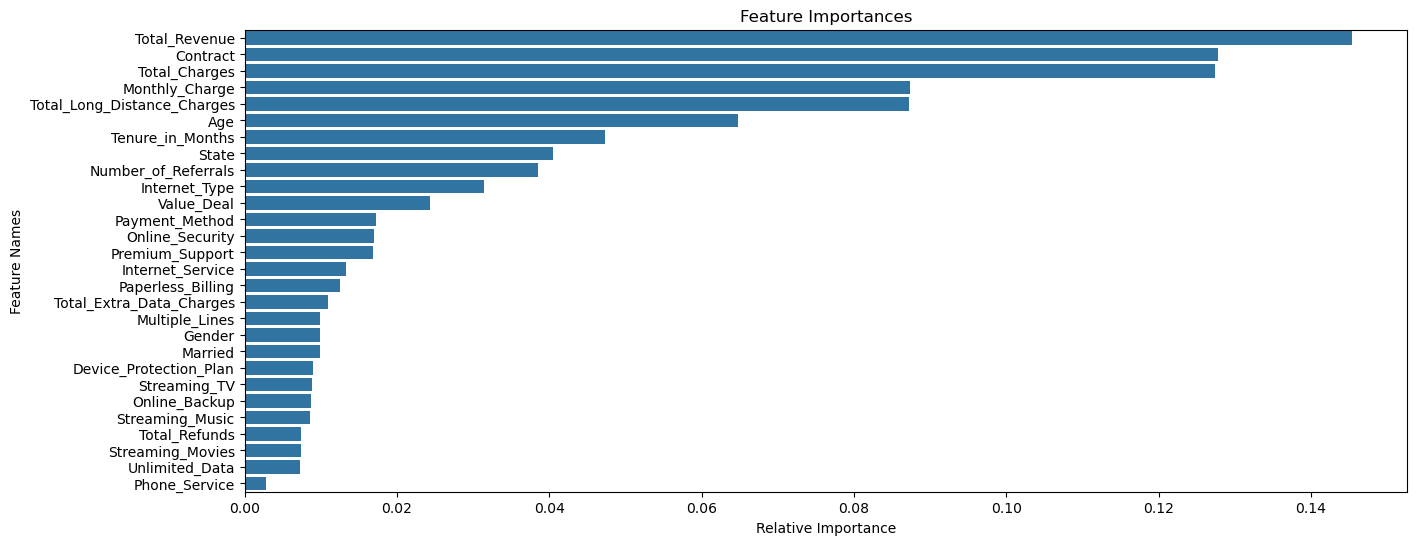

In [24]:
y_pred = rf_model.predict(X_test)
 #Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [32]:
file_path = r"C:\Users\91635\OneDrive\Documents\Data Science Projects\Churn Customer Analysis\Prediction_Data.xlsx"
sheet_name = 'vw_JoinData'
new_data = pd.read_excel(file_path,sheet_name=sheet_name)
print(new_data.head())
original_data = new_data.copy()
customer_ids = new_data['Customer_ID']
new_data = new_data.drop(['Customer_ID','Customer_Status','Churn_Category','Churn_Reason'], axis=1)
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])
new_predictions = rf_model.predict(new_data)
original_data['Customer_Status_Predicted'] = new_predictions
origianl_data =original_data[original_data['Customer_Status_Predicted']==1]
original_data.to_csv(r"C:\Users\91635\OneDrive\Documents\Data Science Projects\Churn Customer Analysis\Predictions.csv", index=False)


  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                20        NaN           Yes             No  ...   
2                35        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                10        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdrawal      90.4